In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_pop=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/population_india_census2011.csv')
df_bed=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/HospitalBedsIndia.csv')
df_Age=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/AgeGroupDetails.csv')
df_ICMR=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/ICMRTestingLabs.csv')
df_individ=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/IndividualDetails.csv')
df_State=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/StatewiseTestingDetails.csv')
df_covid=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/covid_19_india.csv')

EXTRACTING THE FILES FROM DRIVE(PLEASE CHANGE THE FILE PATHS ACCORDINGLY)

In [4]:
df_covid.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
len(df_State)

5190

In [6]:
df_State.isna().sum()

Date               0
State              0
TotalSamples       0
Negative        2083
Positive         851
dtype: int64

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_State.columns

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

In [7]:
df_state_analysis=df_State.sort_values(by=['State'])

In [8]:
df_filtered=df_state_analysis.sort_values(by=['Date'])

In [9]:
df_covid_KA=df_filtered[df_filtered['State']=='Karnataka']

In [10]:
df_covid_KA=df_covid_KA.sort_values(by=['Date'])

In [11]:
df_covid_KA=df_covid_KA[['Date','Positive']]

In [12]:
df_covid_KA1=df_covid_KA[:130]

**CLEANING THE KARNATAKA DATASET**

In [13]:
df_covid_KA1

,Date,Positive
2259,2020-04-03,128.0
2260,2020-04-07,175.0
2261,2020-04-08,181.0
2262,2020-04-09,197.0
2263,2020-04-10,207.0
...,...,...
2384,2020-08-10,182354.0
2385,2020-08-11,NaN
2386,2020-08-12,NaN
2387,2020-08-13,203200.0


In [14]:
df_covid_K=df_covid_KA1.dropna()

In [15]:
df_covid_K

,Date,Positive
2259,2020-04-03,128.0
2260,2020-04-07,175.0
2261,2020-04-08,181.0
2262,2020-04-09,197.0
2263,2020-04-10,207.0
...,...,...
2382,2020-08-08,172102.0
2383,2020-08-09,178087.0
2384,2020-08-10,182354.0
2387,2020-08-13,203200.0


**INCREASE IN TREND FOR KARNATAKA**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
No handles with labels found to put in legend.


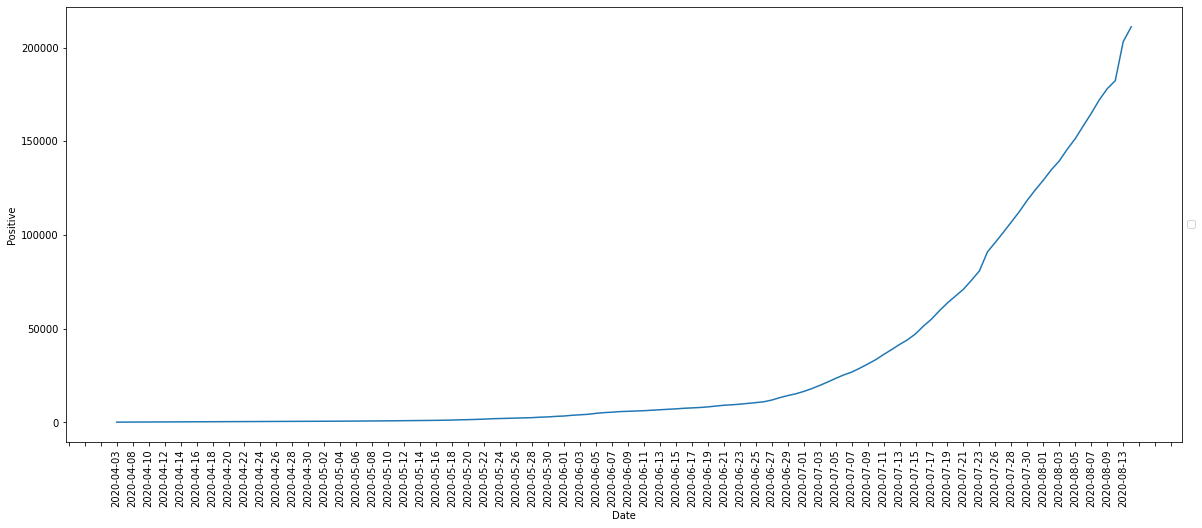

In [17]:
import seaborn as sns
import matplotlib.ticker as ticker
fig = plt.gcf()
fig.set_size_inches(20, 8)
g=sns.lineplot(x="Date", y="Positive",data=df_covid_K)
plt.xticks(rotation=90)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [18]:
df_covid_K.head()

,Date,Positive
2259,2020-04-03,128.0
2260,2020-04-07,175.0
2261,2020-04-08,181.0
2262,2020-04-09,197.0
2263,2020-04-10,207.0


In [19]:
df_covid_K.reset_index(inplace=True)
df_covid_K['Date'] = pd.to_datetime(df_covid_K['Date'])
df_covid_K = df_covid_K.set_index('Date')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
Y=df_covid_K['Positive'] #Initializing Labels

**ANALYSING THE TREND SEASONAL AND NOISE COMPONENT**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


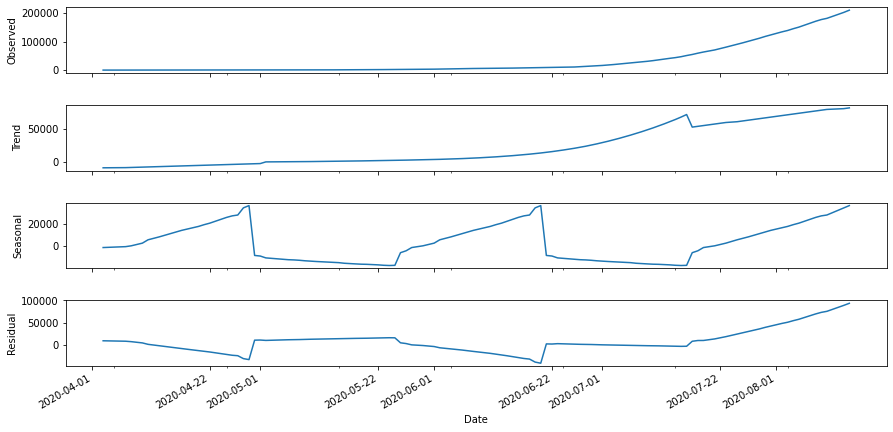

In [22]:
import statsmodels.api as sm
decom=sm.tsa.seasonal_decompose(Y,model='additive',extrapolate_trend='freq',freq=52)
fig=decom.plot()
fig.set_size_inches(14,7)
plt.show()

In [23]:
Y_train=df_covid_K[:90]['Positive']

In [24]:
Y_test=df_covid_K[90:110]['Positive']
Y_val=df_covid_K[110:]['Positive']

**HOLT LINEAR TREND AND HOLT EXPONENTIAL TREND**

In [25]:

from statsmodels.tsa.api import Holt
import numpy as np
fit1 = Holt(Y_train).fit(0.6,0.2, optimized=False)
fcast1 = fit1.forecast(len(Y_test)).rename("Holt")
fcast1=fcast1.reset_index(drop=True)
l=[]
for i in range(len(fcast1)):
  mse = (fcast1[i]-Y_test[i])**2
  l.append(mse)
mse1=sum(l)/len(l)
print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))
fit2 = Holt(Y_train,exponential=True).fit(0.6,0.2,optimized=False)
fcast2 = fit2.forecast(len(Y_test)).rename("Holt")
fcast2=fcast2.reset_index(drop=True)
l=[]
for i in range(len(fcast2)):
  mse = (fcast2[i]-Y_test[i])**2
  l.append(mse)
mse1=sum(l)/len(l)
print('The Root Mean Squared Error of Holt''s exponential trend {}'.format(round(np.sqrt(mse1), 2)))


The Root Mean Squared Error of Holts Linear trend 20011.1
The Root Mean Squared Error of Holts exponential trend 5212.13


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


*HOLT EXPONENTIAL TREND*

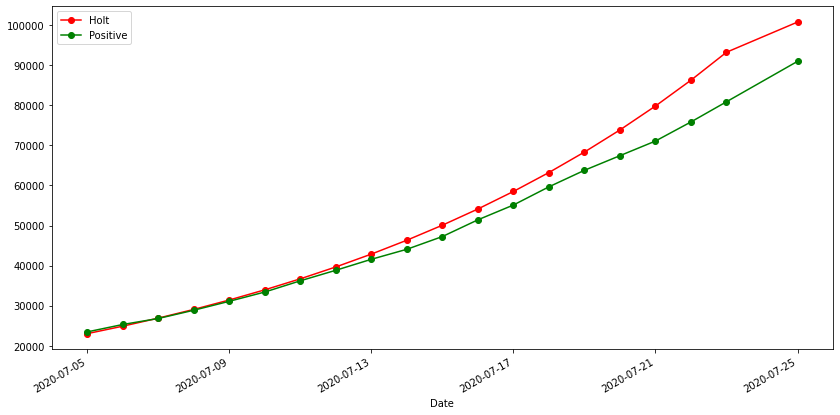

In [26]:
#fit2.fittedvalues.plot(marker="o", color='red')
fcast2.index=Y_test.index
fcast2.plot(color='red', marker="o", legend=True,figsize=(14,7))
Y_test.plot(color='green',marker='o',legend=True)

LINEAR TREND

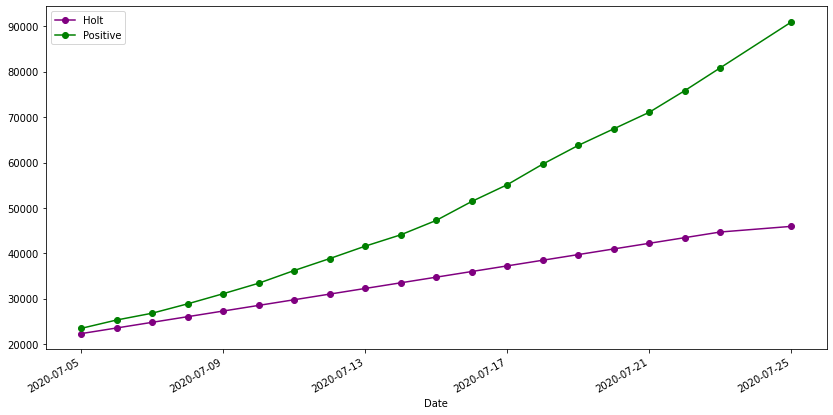

In [27]:
fcast1.index=Y_test.index
fcast1.plot(color='purple', marker="o", legend=True,figsize=(14,7))
Y_test.plot(color='green',marker='o',legend=True)

HOLT WINTER 

In [31]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(Y_train,seasonal_periods=2 ,trend='add', seasonal='add',).fit()
fcast1 = fit1.forecast(len(Y_test)).rename("Holt")
fcast1=fcast1.reset_index(drop=True)
l=[]
for i in range(len(fcast1)):
  mse = (fcast1[i]-Y_test[i])**2
  l.append(mse)
mse1=sum(l)/len(l)
print('The Root Mean Squared Error of additive trend, additive seasonal of is {}'.format(round(np.sqrt(mse1), 2)))


The Root Mean Squared Error of additive trend, additive seasonal of is 12862.97


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


**HOLT WINTER ADDITIVE TREND ADDITIVE SEASONAL**

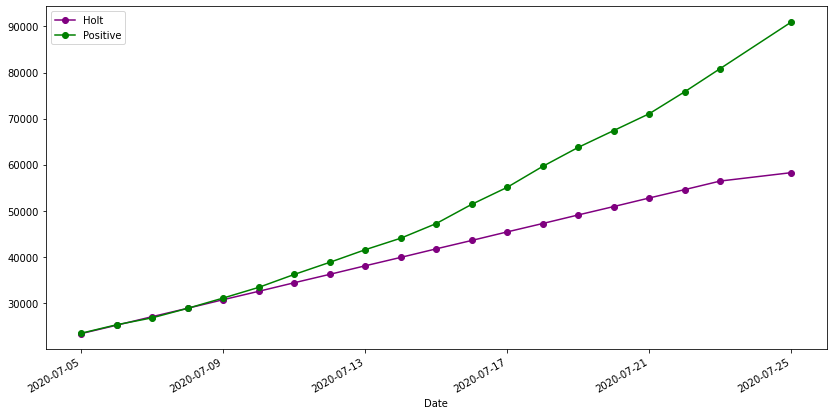

In [ ]:
fcast1.index=Y_test.index
fcast1.plot(color='purple', marker="o", legend=True,figsize=(14,7))
Y_test.plot(color='green',marker='o',legend=True)

**HOLT WINTER ADDITIVE TREND AND MULTIPLICATIVE SEASONAL**

In [35]:
fit1 = ExponentialSmoothing(Y_train, seasonal_periods = 7, trend='add', seasonal='Multiplicative').fit(use_boxcox=True)
fcast1 = fit1.forecast(len(Y_test)).rename('Mulitplicative')
mse1 = ((fcast1 - Y_test) ** 2).mean()
fcast1=fcast1.reset_index(drop=True)
l=[]
for i in range(len(fcast1)):
  mse = (fcast1[i]-Y_test[i])**2
  l.append(mse)
mse1=sum(l)/len(l)
print('The Root Mean Squared Error of additive trend, multiplicative seasonal is {}'.format(round(np.sqrt(mse1), 2)))


The Root Mean Squared Error of additive trend, multiplicative seasonal is 20904.52


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


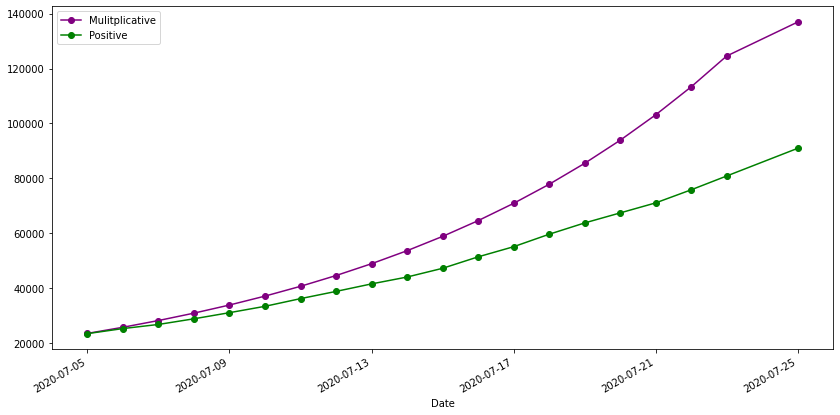

In [36]:
fcast1.index=Y_test.index
fcast1.plot(color='purple', marker="o", legend=True,figsize=(14,7))
Y_test.plot(color='green',marker='o',legend=True)

**HOLT EXPONENTIAL TREND WITHOUT SEASONAL COMPONENT PERFORMS THE BEST**